<a href="https://colab.research.google.com/github/lcbjuk/ML/blob/master/Aula6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Arima**

In [0]:
import pandas as pd
cov = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
cov

In [0]:
 
bra=cov[ cov['Country/Region']=='Brazil' ]
bra

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,4,4,13,13,20,25,31,38,52,151,151,162,200,321,372,621,793,1021,1546,1924,2247,2554,2985,3417,3904,4256,4579


In [0]:
bra=bra.iloc[:,4:].melt()
bra


,variable,value
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
64,3/26/20,2985
65,3/27/20,3417
66,3/28/20,3904
67,3/29/20,4256


In [0]:
br= bra[ bra['value']>100 ]
br

,variable,value
51,3/13/20,151
52,3/14/20,151
53,3/15/20,162
54,3/16/20,200
55,3/17/20,321
56,3/18/20,372
57,3/19/20,621
58,3/20/20,793
59,3/21/20,1021
60,3/22/20,1546


In [0]:
brazil = [x for x in br['value']]
brazil

[151,
 151,
 162,
 200,
 321,
 372,
 621,
 793,
 1021,
 1546,
 1924,
 2247,
 2554,
 2985,
 3417,
 3904,
 4256,
 4579]

In [0]:
from statsmodels.tsa.arima_model import ARIMA

prevs = list()
for t in range(7):
  arima = ARIMA(brazil, order=(1,1,0))
  modelo = arima.fit(disp=0)
  out = modelo.forecast()
  yhat = out[0]
  prevs.append(yhat)
  brazil.append(yhat)
  print(yhat)

[4881.0177646]
[5167.02996012]
[5440.77342233]
[5705.06700583]
[5962.04813781]
[6213.34479525]
[6460.20356015]


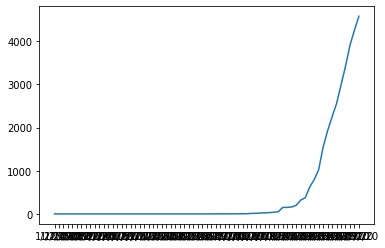

In [0]:
import matplotlib.pyplot as plt
plt.plot(bra['variable'] , bra['value'])
plt.show()

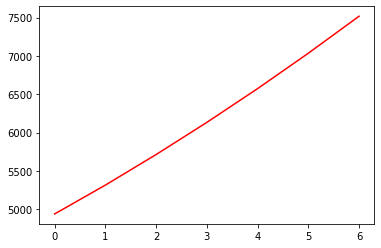

In [0]:
plt.plot(prevs,color='red')

**Prophet**

In [0]:
import pandas as pd
cov = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
cov

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,Anguilla,United Kingdom,18.2206,-63.0686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2
250,British Virgin Islands,United Kingdom,18.4207,-64.6400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2
251,Turks and Caicos Islands,United Kingdom,21.6940,-71.7979,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,5
252,NaN,MS Zaandam,0.0000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2


In [0]:
bra=cov[ cov['Country/Region']=='Brazil' ]
bra

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20
28,NaN,Brazil,-14.235,-51.9253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,2,4,4,13,13,20,25,31,38,52,151,151,162,200,321,372,621,793,1021,1546,1924,2247,2554,2985,3417,3904,4256,4579


In [0]:
bra=bra.iloc[:,4:].melt()
bra


,variable,value
0,1/22/20,0
1,1/23/20,0
2,1/24/20,0
3,1/25/20,0
4,1/26/20,0
...,...,...
64,3/26/20,2985
65,3/27/20,3417
66,3/28/20,3904
67,3/29/20,4256


In [0]:
br= bra[ bra['value']>25 ]
br

,variable,value
48,3/10/20,31
49,3/11/20,38
50,3/12/20,52
51,3/13/20,151
52,3/14/20,151
53,3/15/20,162
54,3/16/20,200
55,3/17/20,321
56,3/18/20,372
57,3/19/20,621


In [0]:
br.reset_index(inplace=True)
br

,index,variable,value
0,48,3/10/20,31
1,49,3/11/20,38
2,50,3/12/20,52
3,51,3/13/20,151
4,52,3/14/20,151
5,53,3/15/20,162
6,54,3/16/20,200
7,55,3/17/20,321
8,56,3/18/20,372
9,57,3/19/20,621


In [0]:
br.drop('index',axis=1,inplace=True)
br

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,variable,value
0,3/10/20,31
1,3/11/20,38
2,3/12/20,52
3,3/13/20,151
4,3/14/20,151
5,3/15/20,162
6,3/16/20,200
7,3/17/20,321
8,3/18/20,372
9,3/19/20,621


In [0]:
from fbprophet import Prophet

br = br.rename(columns={'variable':'ds' , 'value':'y' })
br['ds'] = pd.to_datetime(br['ds'])
br

,ds,y
0,2020-03-10,31
1,2020-03-11,38
2,2020-03-12,52
3,2020-03-13,151
4,2020-03-14,151
5,2020-03-15,162
6,2020-03-16,200
7,2020-03-17,321
8,2020-03-18,372
9,2020-03-19,621


In [0]:
prof = Prophet(interval_width=0.95)
prof.fit(br)
x_dias = prof.make_future_dataframe(periods=7)
futuro = prof.predict(x_dias)
futuro[['ds','yhat','yhat_lower','yhat_upper']].tail(10)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 15.


,ds,yhat,yhat_lower,yhat_upper
18,2020-03-28,3345.649483,2406.133134,4297.978185
19,2020-03-29,3641.711574,2730.635938,4620.723638
20,2020-03-30,3888.107094,2884.742043,4897.199815
21,2020-03-31,4173.730381,3182.859287,5153.522352
22,2020-04-01,4295.548452,3295.989748,5227.561029
23,2020-04-02,4527.030222,3566.195227,5630.025038
24,2020-04-03,4761.479567,3688.565434,5679.435202
25,2020-04-04,4999.893636,4003.316675,6002.418356
26,2020-04-05,5295.955727,4313.330370,6288.106663
27,2020-04-06,5542.351247,4497.326976,6465.908642


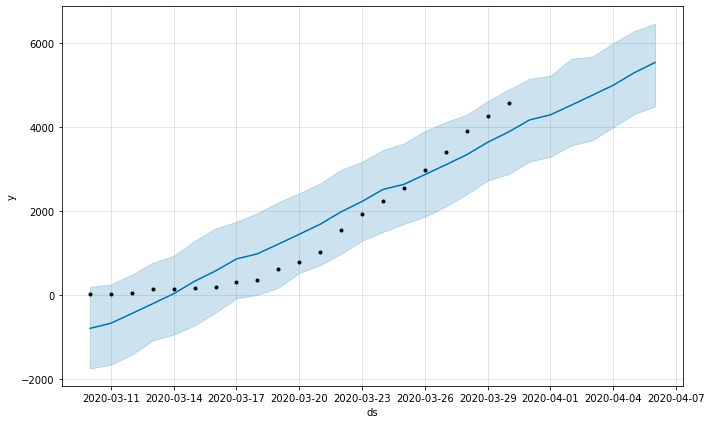

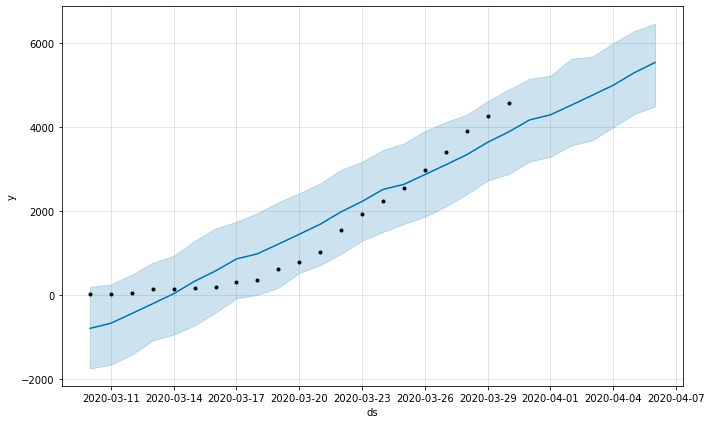

In [0]:
prof.plot(futuro)